# Extract DeepCell Mesmer sample data

Load the DeepCell Mesmer samples `deepcell.datasets.multiplex_tissue` 

**Caution**! This may not work with more recent versions; I think they put an API key in front of this. But: this is a helper notebook; the interesting parts (extracted data) will be distributed as part of this repo.

In [1]:
output_path_template = '../sample-data/deepcell/mesmer-sample-%s/'

In [2]:
# Download multiplex data
from deepcell.datasets import multiplex_tissue
((X_train, y_train),(X_test, y_test)) = multiplex_tissue.load_data()

In [3]:
# Save the channels.
import gzip
import numpy as np
from pathlib import Path

for sample_index in range(len(X_train)):
    input_channels = X_train[sample_index, ...]

    output_path = output_path_template % sample_index
    Path(output_path).mkdir(parents=True, exist_ok=True)
    
    np.savez_compressed('%s/input_channels.npz' % output_path, input_channels=input_channels)

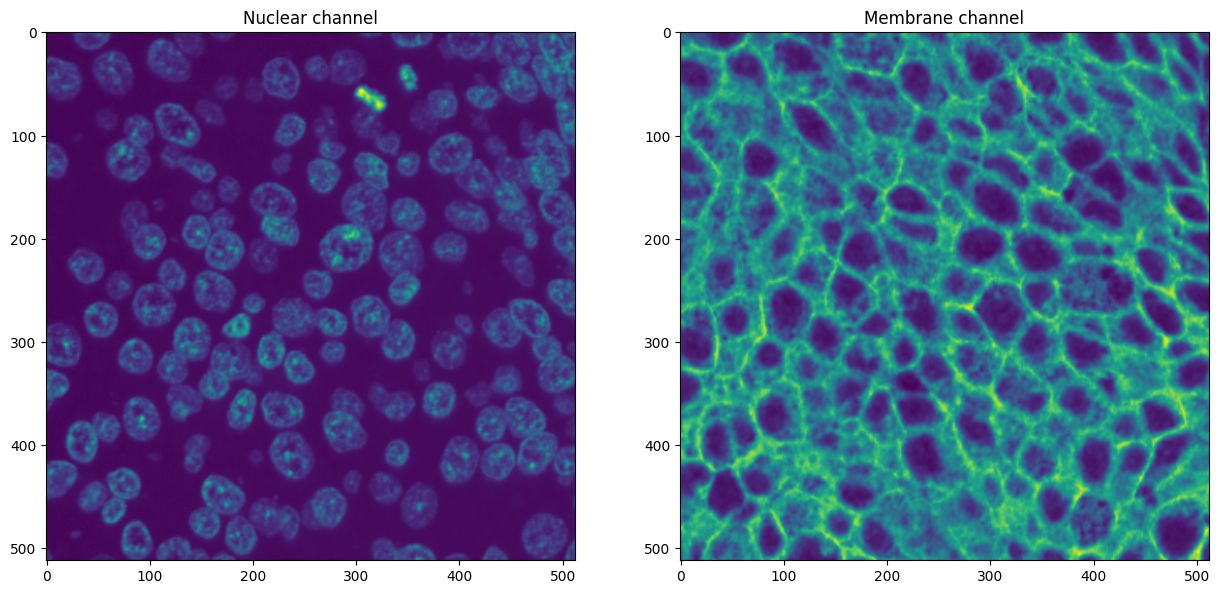

In [4]:
# Visualize 1 sample pair of nuclear/membrane channels
from matplotlib import pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(15, 15))
ax[0].imshow(X_train[3, ..., 0])
ax[1].imshow(X_train[3, ..., 1])
ax[0].set_title('Nuclear channel')
ax[1].set_title('Membrane channel')
plt.show()